In [0]:
#Vector quantization by deterministic annealing

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:01, 7990308.46it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 433729.66it/s]
  1%|          | 16384/1648877 [00:00<00:11, 141991.19it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5114533.27it/s]                            
8192it [00:00, 178403.18it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

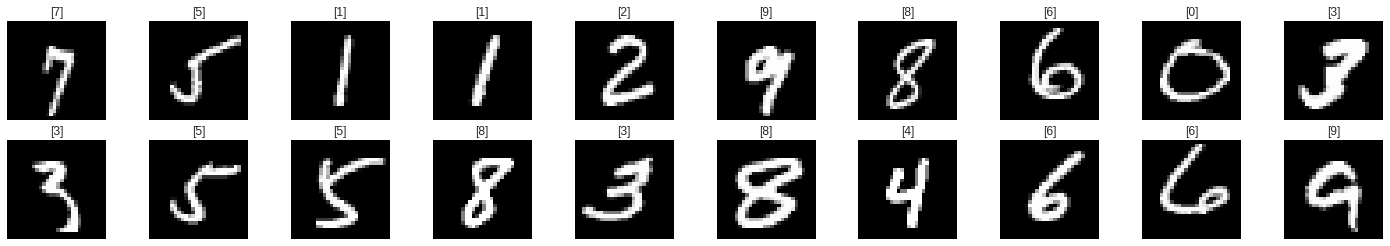

In [6]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])
  

In [0]:
img_size = 28*28
def d(x, y):
  return torch.sqrt(torch.sum(torch.pow(x.view(1,img_size)-y,2), dim=1))

In [0]:

def run_annealing(beta, lr, epochs, digits):
  nclass = 20
  #y = torch.autograd.Variable(torch.randn(nclass, img_size).to(device), requires_grad=True)
  y = torch.autograd.Variable(torch.randn(nclass, img_size), requires_grad=True)
  x_loader = validation_loader
  for e in range(epochs):
    for inputs, labels in x_loader:
      #inputs = inputs.to(device)
      #labels = labels.to(device)

      F = torch.tensor(0.0, requires_grad=True)
      for x, k in zip(inputs, labels):
        if k.item() not in digits:
          continue
        F = F + torch.logsumexp(-beta * d(x, y), dim=0)
      F = F * -1/beta
      F.backward()
      y = torch.autograd.Variable(y - lr * y.grad.data, requires_grad=True)
    print('epoch:', e, " F:", F.item())
  return y
    
def plot_20proxies(y):
  fig = plt.figure(figsize=(25,4))
  for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])

    image = y[idx].detach().numpy().reshape([28,28])
    image = image * 0.5 + 0.5
    image = image.clip(0,1)
    plt.imshow(image)

epoch: 0  F: -8739.2724609375
epoch: 1  F: -9005.0048828125
epoch: 2  F: -9097.4130859375
epoch: 3  F: -9111.60546875
epoch: 4  F: -9112.794921875


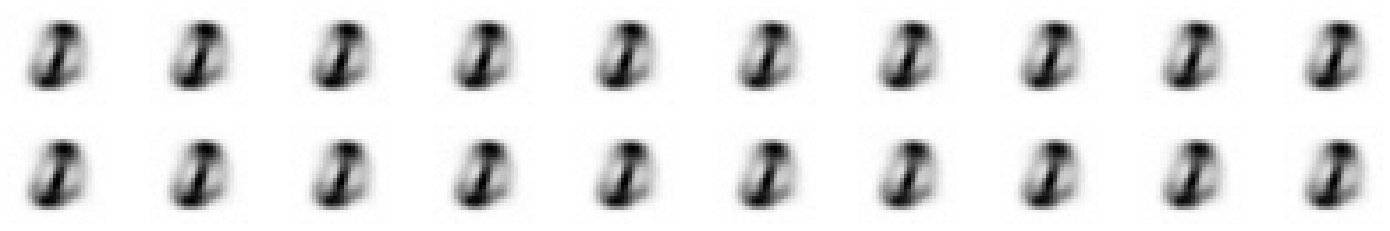

In [296]:
y = run_annealing(beta = 0.01, lr=0.1, epochs=5, digits = [0,1,2])
plot_20proxies(y)

If beta is small, the centroids are at the same point.

They can't distinguish 0 and 1.

epoch: 0  F: 297.6623229980469
epoch: 1  F: 151.61102294921875
epoch: 2  F: 118.94750213623047
epoch: 3  F: 78.22335052490234
epoch: 4  F: 48.86752700805664


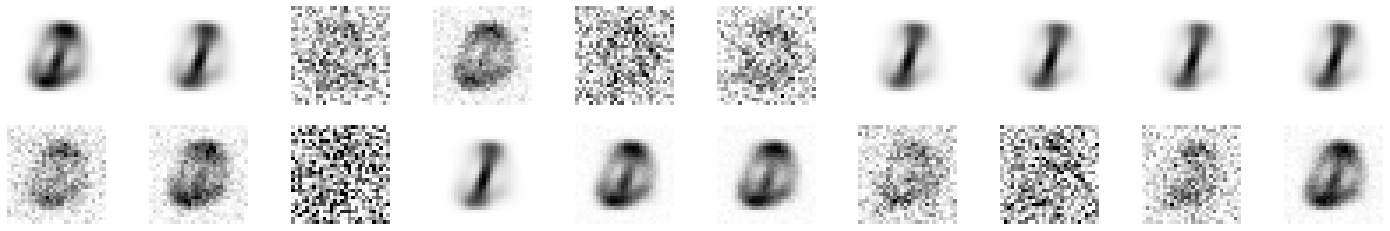

In [298]:
y = run_annealing(beta = 0.2, lr=0.1, epochs=5, digits = [0,1,2])
plot_20proxies(y)

epoch: 0  F: 448.49859619140625
epoch: 1  F: 391.85931396484375
epoch: 2  F: 391.8438415527344
epoch: 3  F: 391.8376770019531
epoch: 4  F: 391.8312072753906


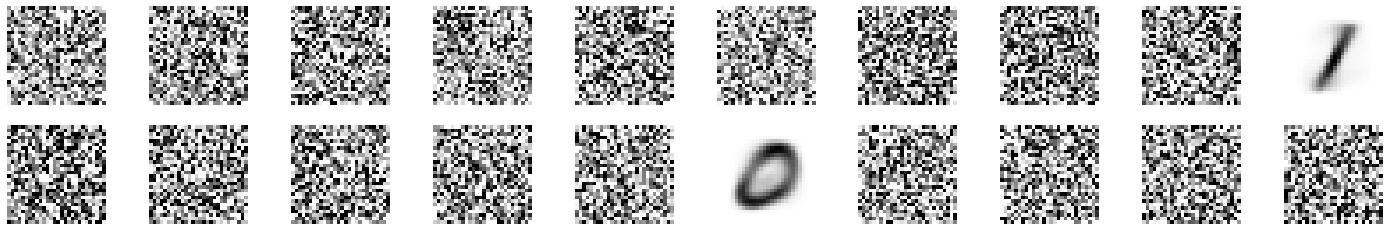

In [300]:
y = run_annealing(beta = 0.4, lr=0.1, epochs=5, digits = [0,1,2])
plot_20proxies(y)

epoch: 0  F: 458.19439697265625
epoch: 1  F: 458.1642150878906
epoch: 2  F: 458.1257629394531
epoch: 3  F: 458.07421875
epoch: 4  F: 457.9991760253906
epoch: 5  F: 457.8750305175781
epoch: 6  F: 457.6087951660156
epoch: 7  F: 456.4501953125
epoch: 8  F: 391.64385986328125
epoch: 9  F: 391.82757568359375
epoch: 10  F: 391.8182067871094
epoch: 11  F: 391.7981262207031
epoch: 12  F: 391.7715759277344
epoch: 13  F: 391.73431396484375
epoch: 14  F: 391.6781311035156
epoch: 15  F: 391.5824890136719
epoch: 16  F: 391.3849182128906
epoch: 17  F: 390.76458740234375
epoch: 18  F: 381.81170654296875
epoch: 19  F: 365.7723693847656
epoch: 20  F: 366.5190734863281
epoch: 21  F: 366.9569396972656
epoch: 22  F: 366.9408264160156
epoch: 23  F: 366.9232177734375
epoch: 24  F: 366.91546630859375
epoch: 25  F: 366.91162109375
epoch: 26  F: 366.9090576171875
epoch: 27  F: 366.9066467285156
epoch: 28  F: 366.90435791015625
epoch: 29  F: 366.9020080566406
epoch: 30  F: 366.89947509765625
epoch: 31  F: 366.8

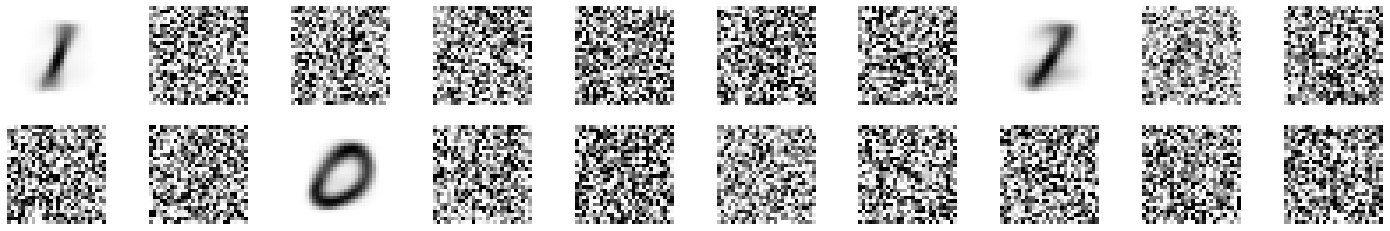

In [291]:
y = run_annealing(beta = 0.4, lr=0.1, epochs=50, digits = [0,1,2])
plot_20proxies(y)

If beta is large, the centroids go apart.

They can distinguish 0, 1, and 2.

epoch: 0  F: 684.5307006835938
epoch: 1  F: 684.4357299804688
epoch: 2  F: 684.2736206054688
epoch: 3  F: 683.8818359375
epoch: 4  F: 680.6824340820312
epoch: 5  F: 598.7677001953125
epoch: 6  F: 598.8112182617188
epoch: 7  F: 598.8017578125
epoch: 8  F: 598.7891845703125
epoch: 9  F: 598.7750854492188
epoch: 10  F: 598.7594604492188
epoch: 11  F: 598.7418823242188
epoch: 12  F: 598.7218627929688
epoch: 13  F: 598.6986694335938
epoch: 14  F: 598.6710815429688
epoch: 15  F: 598.6376953125
epoch: 16  F: 598.5953979492188
epoch: 17  F: 598.5386962890625
epoch: 18  F: 598.4554443359375
epoch: 19  F: 598.3112182617188
epoch: 20  F: 597.9642333984375
epoch: 21  F: 595.5877685546875
epoch: 22  F: 551.9849243164062
epoch: 23  F: 552.0447387695312
epoch: 24  F: 552.0396728515625
epoch: 25  F: 552.0184326171875
epoch: 26  F: 551.9884643554688
epoch: 27  F: 551.9501953125
epoch: 28  F: 551.902099609375
epoch: 29  F: 551.8388671875
epoch: 30  F: 551.7506103515625
epoch: 31  F: 551.6134643554688
ep

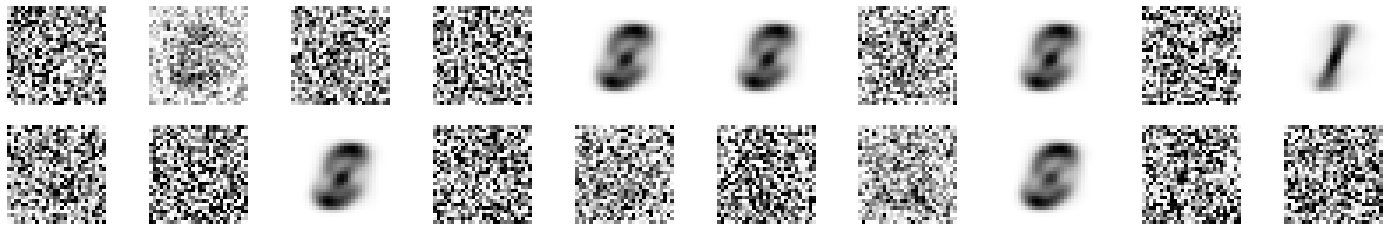

In [301]:
y = run_annealing(beta = 0.4, lr=0.1, epochs=50, digits = [0,1,2,5,8])
plot_20proxies(y)

I increased the number of  digits, i.e., 0, 1, 2, 5, and 8.  

The model can distinguish only 2 classes, i.e., 1 and the others.

epoch: 0  F: 685.1824951171875
epoch: 1  F: 685.1797485351562
epoch: 2  F: 685.1768798828125
epoch: 3  F: 685.1734619140625
epoch: 4  F: 685.1697387695312
epoch: 5  F: 685.1658325195312
epoch: 6  F: 685.1613159179688
epoch: 7  F: 685.1564331054688
epoch: 8  F: 685.15087890625
epoch: 9  F: 685.1445922851562
epoch: 10  F: 685.1373291015625
epoch: 11  F: 685.128662109375
epoch: 12  F: 685.1185302734375
epoch: 13  F: 685.1065063476562
epoch: 14  F: 685.0914306640625
epoch: 15  F: 685.0725708007812
epoch: 16  F: 685.0479736328125
epoch: 17  F: 685.0143432617188
epoch: 18  F: 684.9652099609375
epoch: 19  F: 684.8858642578125
epoch: 20  F: 684.7337036132812
epoch: 21  F: 684.29541015625
epoch: 22  F: 670.3330688476562
epoch: 23  F: 611.2274780273438
epoch: 24  F: 611.1625366210938
epoch: 25  F: 611.0076904296875
epoch: 26  F: 610.3221435546875
epoch: 27  F: 575.0552978515625
epoch: 28  F: 574.0792236328125
epoch: 29  F: 574.1058349609375
epoch: 30  F: 574.1190185546875
epoch: 31  F: 574.12530

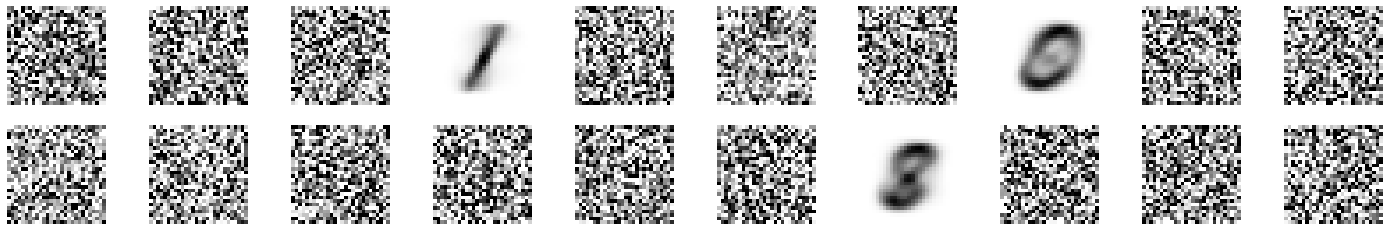

In [305]:
y = run_annealing(beta = 0.5, lr=0.1, epochs=50, digits = [0,1,2,5,8])
plot_20proxies(y)

epoch: 0  F: 685.2024536132812
epoch: 1  F: 685.201171875
epoch: 2  F: 685.1998291015625
epoch: 3  F: 685.1981201171875
epoch: 4  F: 685.1964111328125
epoch: 5  F: 685.1943969726562
epoch: 6  F: 685.192626953125
epoch: 7  F: 685.1906127929688
epoch: 8  F: 685.1881103515625
epoch: 9  F: 685.1856079101562
epoch: 10  F: 685.1829223632812
epoch: 11  F: 685.1797485351562
epoch: 12  F: 685.1763916015625
epoch: 13  F: 685.172607421875
epoch: 14  F: 685.1681518554688
epoch: 15  F: 685.1630859375
epoch: 16  F: 685.1572265625
epoch: 17  F: 685.1503295898438
epoch: 18  F: 685.1417846679688
epoch: 19  F: 685.13134765625
epoch: 20  F: 685.1180419921875
epoch: 21  F: 685.1000366210938
epoch: 22  F: 685.0748291015625
epoch: 23  F: 685.0364379882812
epoch: 24  F: 684.970458984375
epoch: 25  F: 684.8300170898438
epoch: 26  F: 684.3485717773438
epoch: 27  F: 642.734375
epoch: 28  F: 611.3767700195312
epoch: 29  F: 611.376708984375
epoch: 30  F: 611.3764038085938
epoch: 31  F: 611.3760986328125
epoch: 32

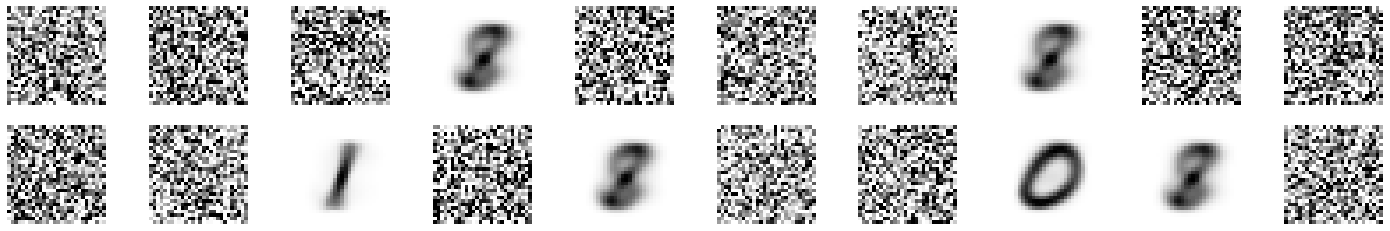

In [306]:
y = run_annealing(beta = 0.5, lr=0.1, epochs=500, digits = [0,1,2,5,8])
plot_20proxies(y)

I increased beta=0.5, but the model can still distinguish only 3 classes, i.e., 0, 1, and the others.

epoch: 0  F: 685.197265625
epoch: 1  F: 685.1932373046875
epoch: 2  F: 685.1889038085938
epoch: 3  F: 685.1836547851562
epoch: 4  F: 685.1774291992188
epoch: 5  F: 685.1697998046875
epoch: 6  F: 685.160400390625
epoch: 7  F: 685.14794921875
epoch: 8  F: 685.1310424804688
epoch: 9  F: 685.1063232421875
epoch: 10  F: 685.0673217773438
epoch: 11  F: 684.9945068359375
epoch: 12  F: 684.8116455078125
epoch: 13  F: 683.6880493164062
epoch: 14  F: 615.2144165039062
epoch: 15  F: 615.265869140625
epoch: 16  F: 615.2655029296875
epoch: 17  F: 615.2650756835938
epoch: 18  F: 615.2646484375
epoch: 19  F: 615.2642211914062
epoch: 20  F: 615.2638549804688
epoch: 21  F: 615.2633666992188
epoch: 22  F: 615.2628784179688
epoch: 23  F: 615.2623901367188
epoch: 24  F: 615.2617797851562
epoch: 25  F: 615.2611694335938
epoch: 26  F: 615.2606811523438
epoch: 27  F: 615.2599487304688
epoch: 28  F: 615.2592163085938
epoch: 29  F: 615.2584228515625
epoch: 30  F: 615.2576904296875
epoch: 31  F: 615.25671386718

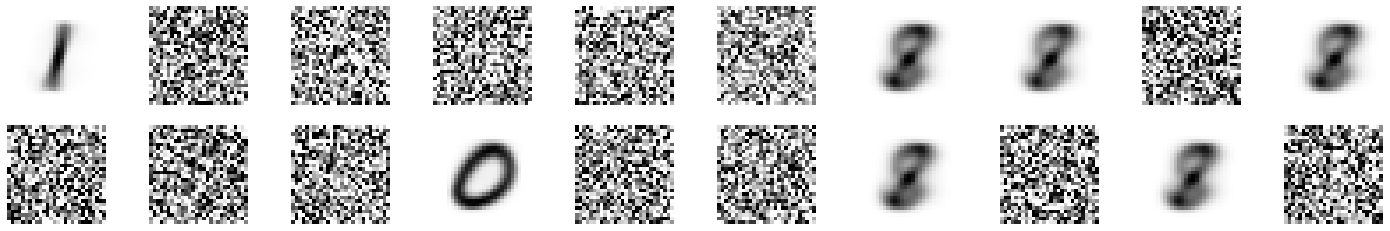

In [14]:
y = run_annealing(beta = 0.55, lr=0.1, epochs=1000, digits = [0,1,2,5,8])
plot_20proxies(y)

epoch: 0  F: 1421.9044189453125
epoch: 1  F: 1420.592529296875
epoch: 2  F: 1280.83154296875
epoch: 3  F: 1280.838623046875
epoch: 4  F: 1280.83837890625
epoch: 5  F: 1280.838134765625
epoch: 6  F: 1280.837646484375
epoch: 7  F: 1280.83740234375
epoch: 8  F: 1280.837158203125
epoch: 9  F: 1280.8367919921875
epoch: 10  F: 1280.83642578125
epoch: 11  F: 1280.8360595703125
epoch: 12  F: 1280.8355712890625
epoch: 13  F: 1280.8350830078125
epoch: 14  F: 1280.834716796875
epoch: 15  F: 1280.8345947265625
epoch: 16  F: 1280.833984375
epoch: 17  F: 1280.833740234375
epoch: 18  F: 1280.83349609375
epoch: 19  F: 1280.8328857421875
epoch: 20  F: 1280.83251953125
epoch: 21  F: 1280.83203125
epoch: 22  F: 1280.83154296875
epoch: 23  F: 1280.8306884765625
epoch: 24  F: 1280.830322265625
epoch: 25  F: 1280.8299560546875
epoch: 26  F: 1280.82958984375
epoch: 27  F: 1280.8291015625
epoch: 28  F: 1280.8282470703125
epoch: 29  F: 1280.8275146484375
epoch: 30  F: 1280.826904296875
epoch: 31  F: 1280.82629

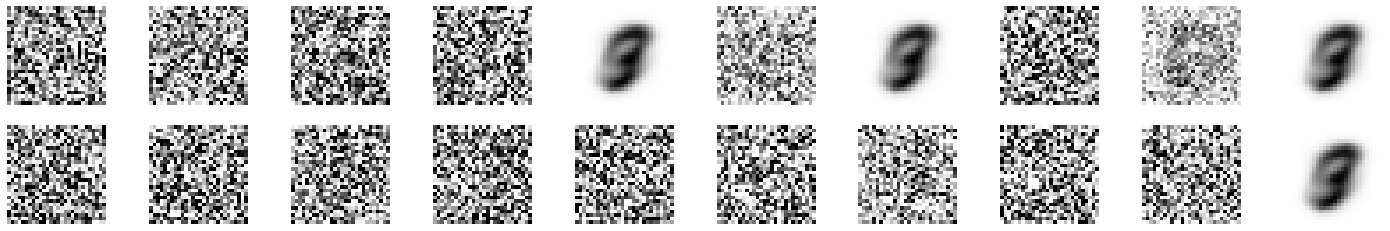

In [15]:
y = run_annealing(beta = 0.55, lr=0.1, epochs=100, digits = [0,1,2,3,4,5,6,7,8,9])
plot_20proxies(y)